# 🎓 Predicting Student Engagement Using Behavioral Analytics
## Asiru Akeem 


This notebook demonstrates an end-to-end machine learning pipeline for predicting student engagement based on simulated behavioral data.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

sns.set(style="whitegrid")


In [2]:

# Load data
#data_path = "../data/student_behavior_data.csv"
df = pd.read_csv("student_behavior_data.csv")
df.head()


,StudentID,ClassAttendanceRate,LMSLoginFrequency,LibraryVisitsPerMonth,AssignmentSubmissionRate,GPA,Engaged
0,1,0.899671,22,1,0.875931,2.910453,1
1,2,0.836174,21,5,0.803242,3.197910,1
2,3,0.914769,13,2,0.931118,3.346428,1
3,4,1.000000,16,6,0.920118,3.367319,1
4,5,0.826585,15,3,0.884458,2.507098,1


## Exploratory Data Analysis

In [4]:

df.describe()


,StudentID,ClassAttendanceRate,LMSLoginFrequency,LibraryVisitsPerMonth,AssignmentSubmissionRate,GPA,Engaged
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,0.847433,19.932000,2.996000,0.896617,2.969828,0.626000
std,144.481833,0.091279,4.646995,1.691658,0.076428,0.479159,0.484348
min,1.000000,0.525873,7.000000,0.000000,0.665644,1.580461,0.000000
25%,125.750000,0.779969,16.750000,2.000000,0.839141,2.637494,0.000000
50%,250.500000,0.851280,20.000000,3.000000,0.901954,2.983447,1.000000
75%,375.250000,0.913678,23.000000,4.000000,0.960888,3.291306,1.000000
max,500.000000,1.000000,34.000000,9.000000,1.000000,4.000000,1.000000


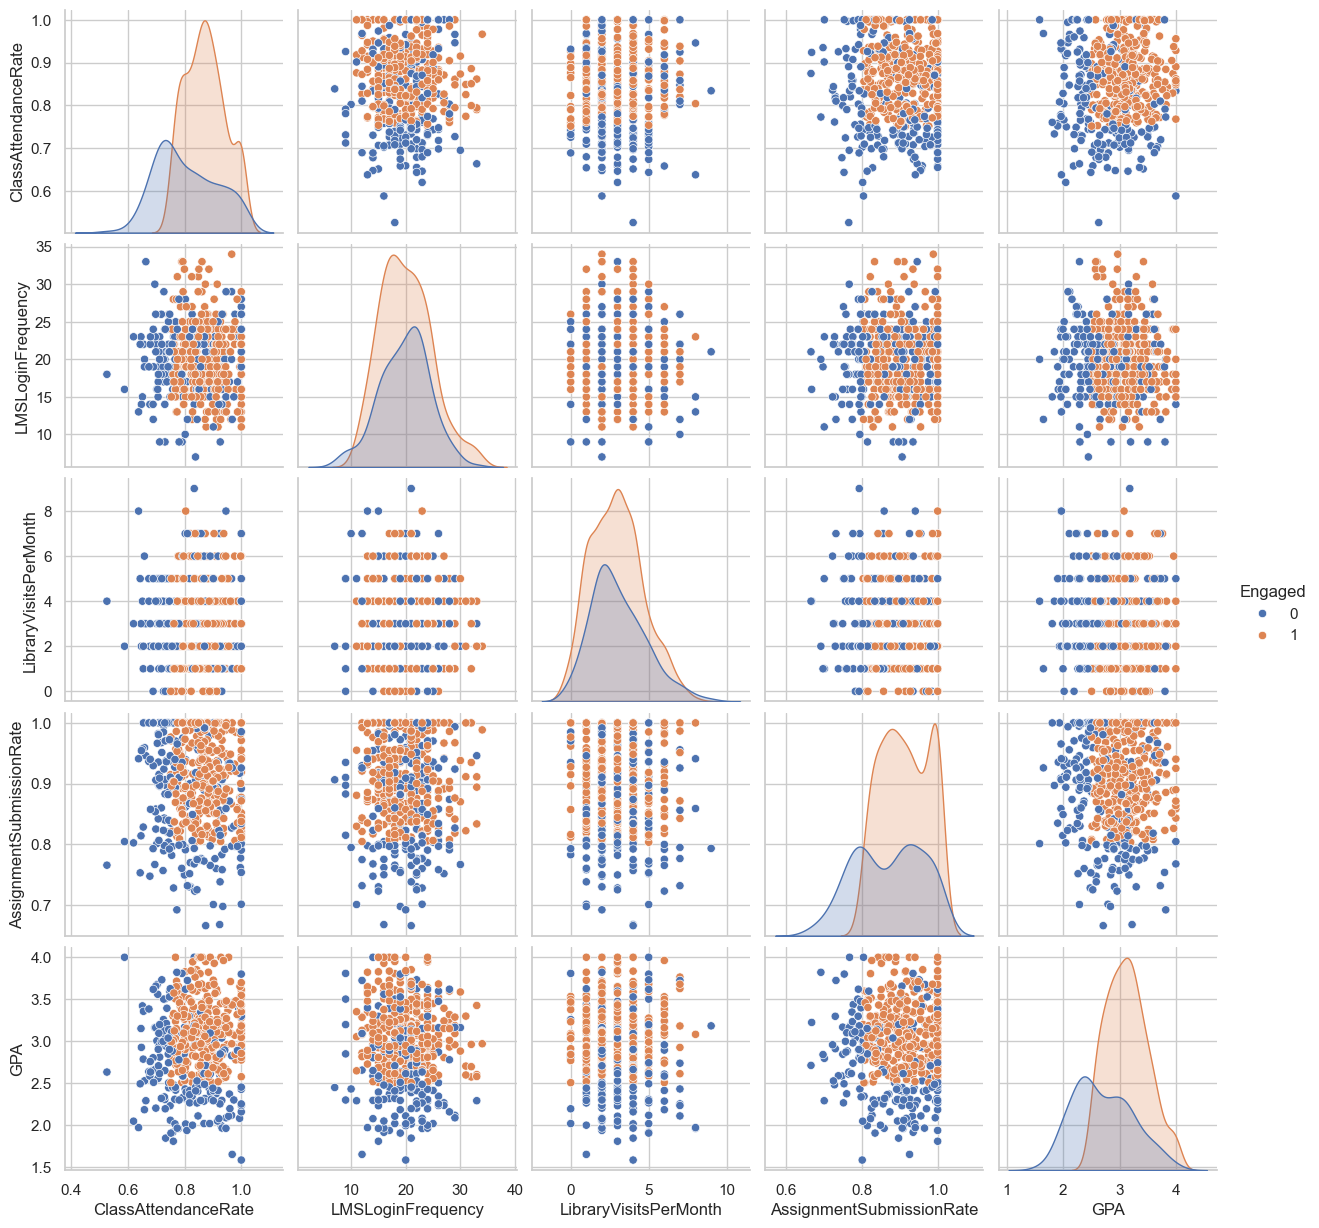

In [9]:

sns.pairplot(df[['ClassAttendanceRate', 'LMSLoginFrequency', 'LibraryVisitsPerMonth', 
                 'AssignmentSubmissionRate', 'GPA', 'Engaged']], hue='Engaged')
plt.show()


## Data Preprocessing

In [16]:

# Feature and target split
X = df.drop(columns=["StudentID", "Engaged"])
y = df["Engaged"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling

In [19]:

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


## Evaluation

In [22]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.55      0.64        31
           1       0.82      0.93      0.87        69

    accuracy                           0.81       100
   macro avg       0.80      0.74      0.76       100
weighted avg       0.81      0.81      0.80       100



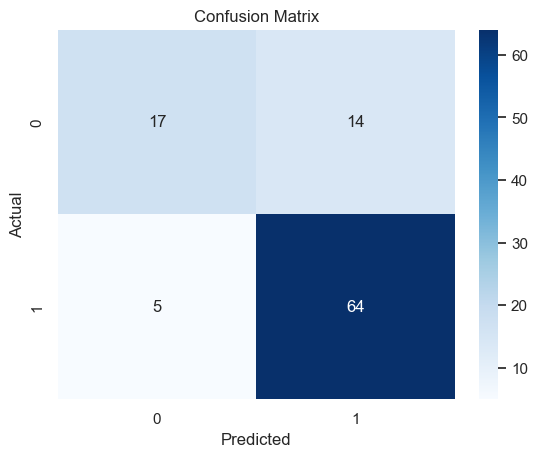

In [24]:

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


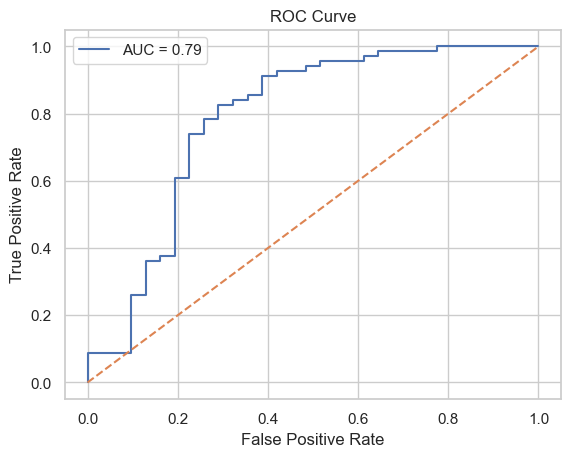

In [26]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
